In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import gridspec
import os

In [2]:
train = '15'
ckp = '42497'
tiles = ['tile_1_463']
epoch = '30'
datasets = ['mapbiomas','Copernicusnew_cf2others','MCD12Q1v6stable_LCProp2']

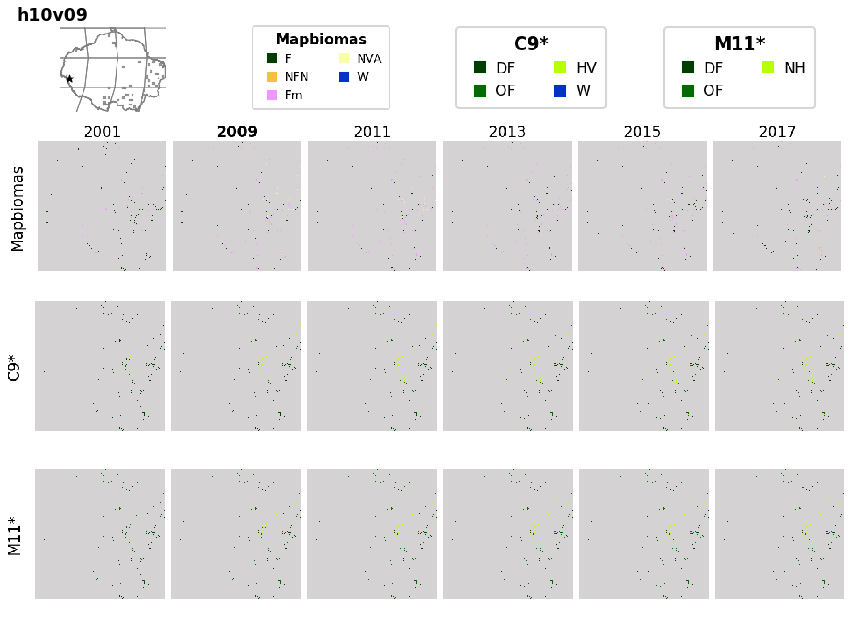

In [8]:
gs0 = gridspec.GridSpec(4, 4,  wspace=0., hspace=0.05, height_ratios= [0.6, 1, 1, 1])
fig = plt.figure(figsize=(15, 11), constrained_layout=False)

indir = os.path.join(r'E:\acocac\research\c4',tiles[0],'post\pngs')
aoi = mpimg.imread(os.path.join(indir,'map_aoi_' + tiles[0] + '.png')) 

for x in range(len(datasets)+1):
    if tiles[0] == 'tile_0_630':
        modis_tile = 'h12v10'
    elif tiles[0] == 'tile_0_201':
        modis_tile = 'h10v08'
    elif tiles[0] == 'tile_1_463':
        modis_tile = 'h10v09'
    
    if x == 0:
        ax00 = fig.add_subplot(gs0[0, x])
        ax00.imshow(aoi)
        ax00.text(-2,-2, modis_tile, size='xx-large', ha="center", weight='bold')
    else:
        suffix = 'convgru64_' + train + '_fold0_' + datasets[x-1] + '_' + ckp
        legend_maps = mpimg.imread(os.path.join(indir,'legend_def2009_' + suffix + '.png')) 
        ax00 = fig.add_subplot(gs0[0, x])
        ax00.imshow(legend_maps)
        terrai_maps = mpimg.imread(os.path.join(indir,'map_terrai_' + suffix + '.png')) 
        ax01 = fig.add_subplot(gs0[x, :])
        ax01.imshow(terrai_maps)
        ax01.axis('off')

    ax00.axis('off')


In [10]:
train = '15'
ckp = '42497'
tiles = ['tile_0_630']
epoch = '30'
datasets = ['mapbiomas','Copernicusnew_cf2others','MCD12Q1v6stable_LCProp2']

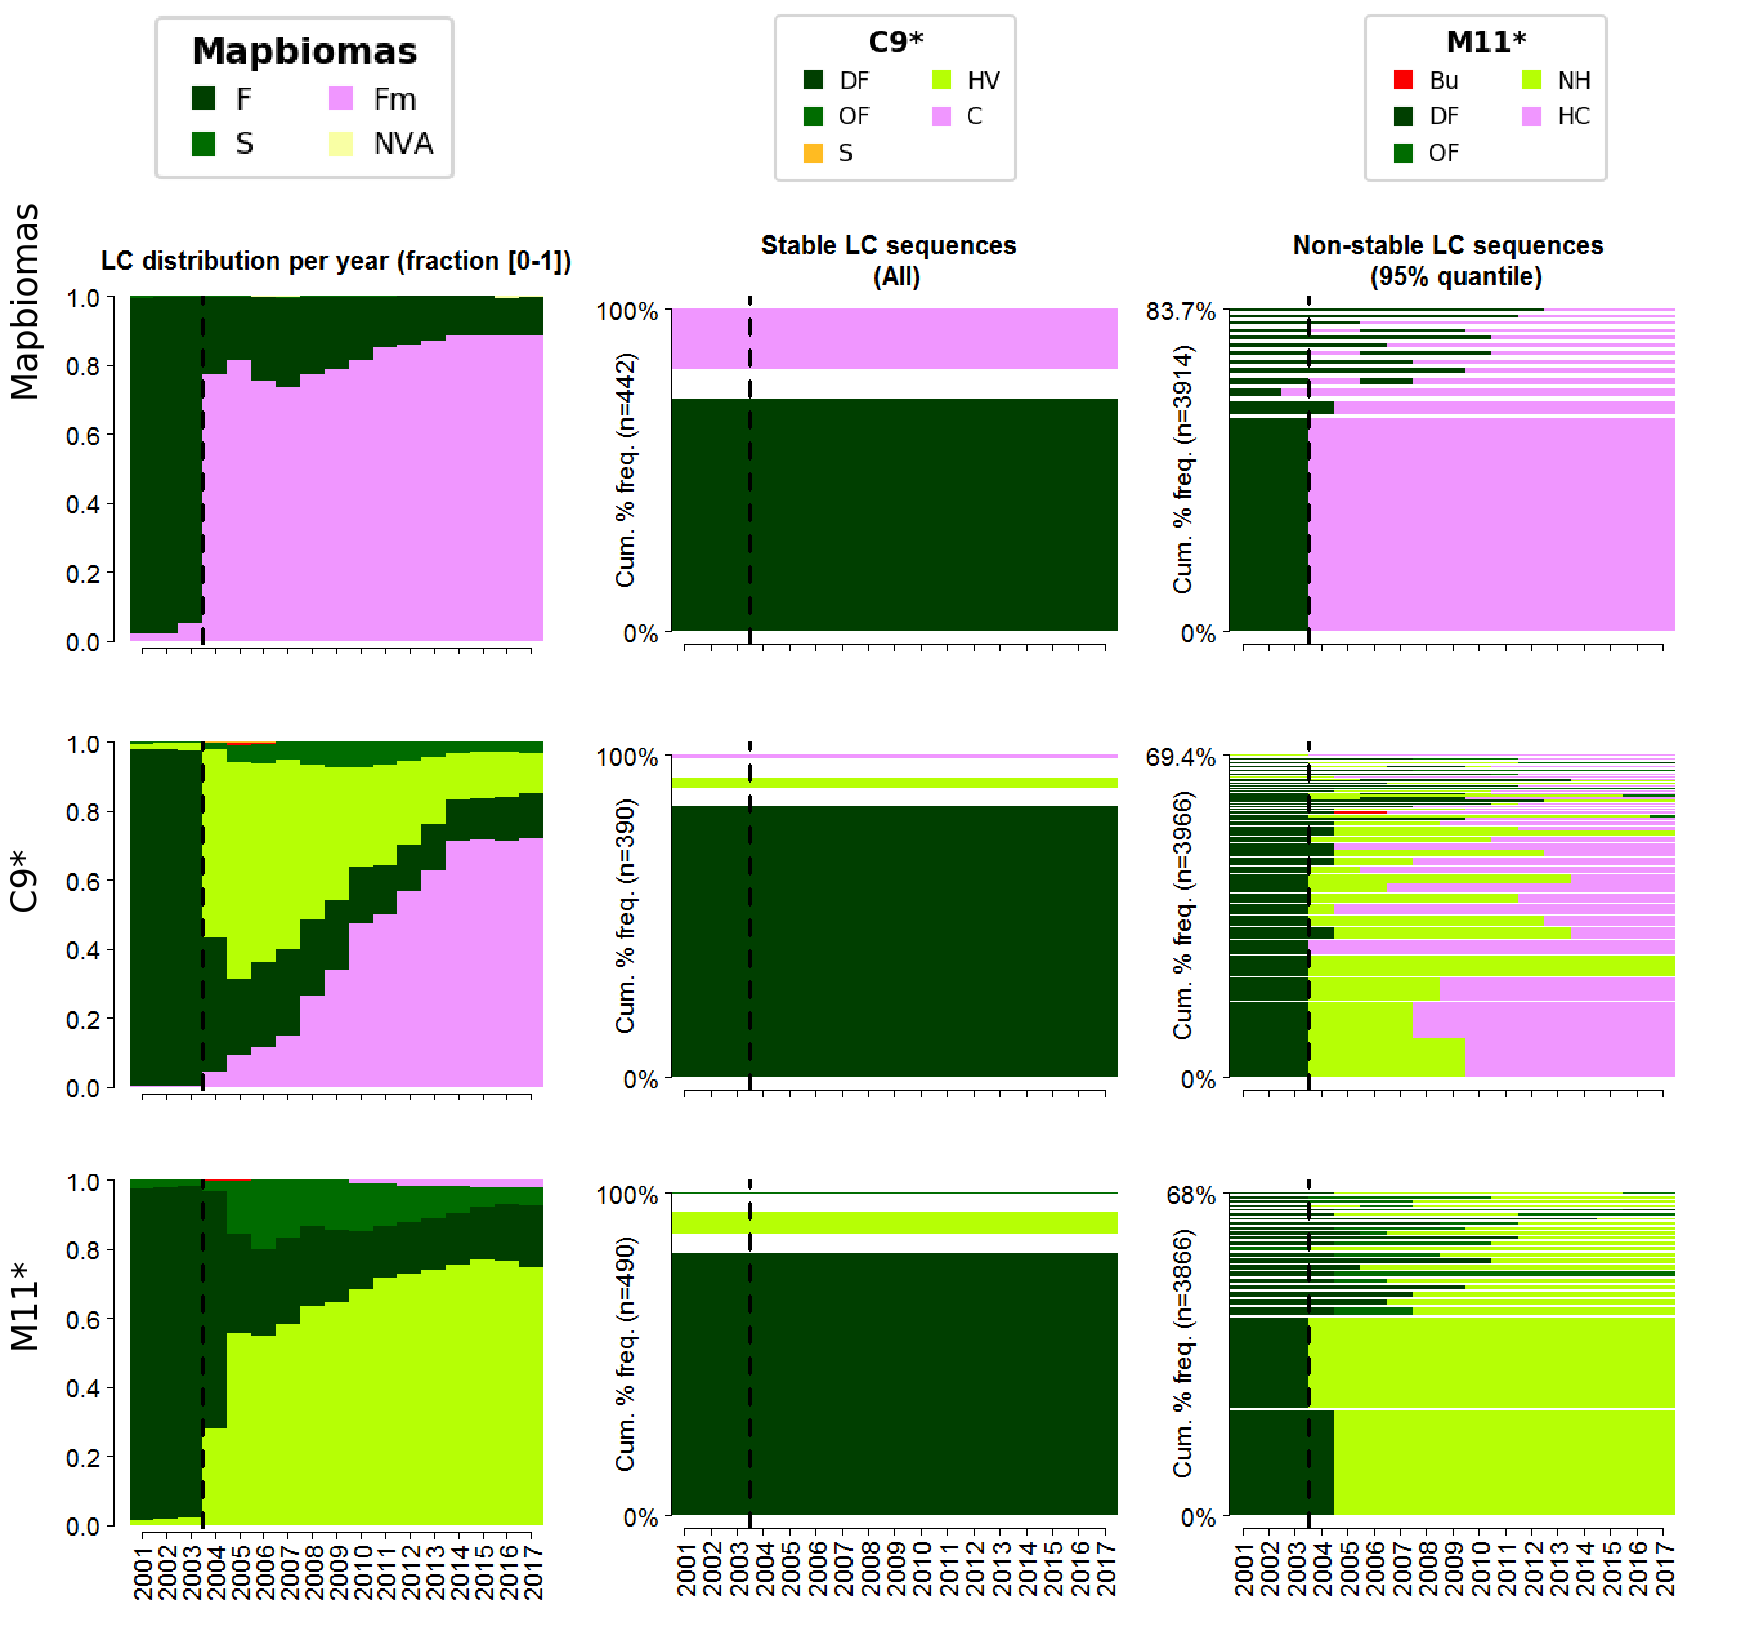

In [11]:
gs0 = gridspec.GridSpec(4, 3, hspace=0.001, height_ratios = [0.4, 1, 1, 1])
fig = plt.figure(figsize=(30, 30), constrained_layout=False)

tyear = '2004'
datasets_name = ['Mapbiomas','C9*','M11*']

indir = os.path.join(r'E:\acocac\research\c4',tiles[0],'post\pngs')

for x in range(len(datasets)):
    
    ax00 = fig.add_subplot(gs0[0, x])
    suffix = 'convgru64_' + train + '_fold0_' + datasets[x] + '_' + ckp
    legend_maps = mpimg.imread(os.path.join(indir,'legend_def' + tyear + '_' + suffix + '.png')) 
    ax00.imshow(legend_maps)
    ax00.axis('off')

    ax01 = fig.add_subplot(gs0[x+1,:])

    if datasets[x] == 'Copernicusnew_cf2others':
        seq_maps = mpimg.imread(os.path.join(indir,'seqoutputs_' + suffix + '_prediction_raw_def' + tyear + '.png')) 
        seq_maps = seq_maps[52:-65,:,:]
        ax01.text(-40,130, datasets_name[x], size=35,rotation='vertical') 
    elif datasets[x] == 'mapbiomas':
        seq_maps = mpimg.imread(os.path.join(indir,'seqoutputs_' + datasets[x] + '_def' + tyear + '.png')) 
        seq_maps = seq_maps[:-65,:,:]
        ax01.text(-40,130, datasets_name[x], size=35,rotation='vertical') 
    elif datasets[x] == 'MCD12Q1v6stable_LCProp2':
        seq_maps = mpimg.imread(os.path.join(indir,'seqoutputs_' + suffix + '_prediction_raw_def' + tyear + '.png')) 
        seq_maps = seq_maps[52:,:,:]
        ax01.text(-40,130, datasets_name[x], size=35,rotation='vertical') 
        
    ax01.imshow(seq_maps)
    ax01.axis('off')
